__author__ = Steven Carriger, __version__ = Fall 2022, __date__ = 7/12/22

__Step 1:__

__INTRODUCTION__:

I found a user analyzing a data report on Kaggle using various different methodology and using the Standord Statistical Reasoning MOOC. This report was done six years ago by the user Tuatini Godard. The methods that he uses to clean, analyze and make prediction models are similar to our process. However, there are differences in how he analyzes the data. In this project. I will be using a combination of his step by step process and our step by step process.

I also found another user with a Kaggle post showing off prediction algorithms. This users name is Armagan Sarikey. I will be using some of the algorithms Armagan provides to determine if it is more accurate.

__KAGGLE LINK:__

Tuatini Godard's analysis can be found here: https://www.kaggle.com/code/ekami66/detailed-exploratory-data-analysis-with-python

Armagan Sarikey's page can be found here: https://www.kaggle.com/code/armagansarikey/machine-learning-2-prediction-algorithms

__TECHNIQUES/CONECPTS:__

__1.__ Tuatini analyzes the top correlations of numerical values before analyzing the graphs to see relations that he should look for in the pair plots. After Tuatini reviews the graphs, he then decides to remove features that seem to be inconsistent or missing in the houses. He doesn't touch or clean the categorical data at all. __While this method is effective and quick, there are a lot of possibilities for errors to occur.__ 

__2.__ Tuatini displays a heat map to show the correlations between the numerical values and the categorical variables and then decides there on the relations on what to get rid of or keep. __This is a more visually pleasing way to analyze the data instead of a table of values and can help you quickly identify relations features share with one another.__

__3.__ Tuatini takes the strongly correlated quantitaive features and analyzes them one by one by graphing their distribution with a regplot. He does not build any models to help further narrow his values. __This is a quick way to further analyze your data and possibly remove any unwanted or irrelevant features.__

__4.__ Tuatini takes the categorical features and compares them to the target variable similar to our process. But then he observes their distribution as well before removing values and deciding if he should remove them or not. He then draws conclusions based on the distribution and removes the ones he feels is not relevant. __This is a generally quick way to remove irrelevant features.__

__5.__ One of the featured that was used in Armagan's page is PolynomialFeatures from sklearn.preprocessing which is then applied to a Linear algorithm which then becomes part of the process called __polynomial regression__. __This process can help models make much more accurate predictions by using a desired degree polynomal compared to a regular linear regression model.__

__NOTES:__ 

All of these techniques and concepts were used to clean and analyze the data. These were the only methods used.

The steps Tuatini took to analyze and clean his data before building prediction models is different than what we do in our class. Tuatini was able to come to a lot of conclusions from just observation of the correlations and visual display of the relations the features have with the target variable.

A lot of the process and techniques that Tuatini uses will not be efficient or possible with a categorical feature as the target variable making this very restrictive as well.

__Step 2:__

__WAYS FOR IMPROVEMENT:__

Tuatini can improve his process by first dropping null values by using .dropna() from his data frame if he so wishes. For example, in his first step, he does not check further for any null values. This could allow null values or unaddressed data passing through. These potential errors could be prevented by just a simple .dropna() and a .replace() method call.

Tuatini can improve his analysis by using an Anova test to improve the process of removing unnecessary/irrelevant features from the data frame. This will help improve the quality of the data being analyzed and can help make a more accurate prediction model.

Tuatini can also improve his analysis process by enforcing a threshold that the data must reach. For example, he could say any feature with a correlation greater than .85 should see that the one with the weaker correlation to the target variable be removed. This can greatly improve the accuracy of the prediction model as well.

Since Armagan's page is more instructoral, there are not as many ways to improve their process without more being added to the environment of the presentation.

In [1]:
#Imports for the project
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle

from pickle import dump
from pickle import load
from sklearn import *
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv('Prostate_Cancer.csv')
target_variable = 'diagnosis_result'

In [2]:
#Step 3a General data cleaning
print('The target variable is:', target_variable)
print('\nThere are currently',  df.isna().sum().sum(), 'null values in the data frame.')
df = df.drop(['id'], axis=1)
df = df.replace({'M' : 1, 'B' : 0})
print('Changing diagnosis_result to numerical value now Malignant = 1, Benign = 0')
df.columns

The target variable is: diagnosis_result

There are currently 0 null values in the data frame.
Changing diagnosis_result to numerical value now Malignant = 1, Benign = 0


Index(['diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

count    100.000000
mean       0.620000
std        0.487832
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: diagnosis_result, dtype: float64


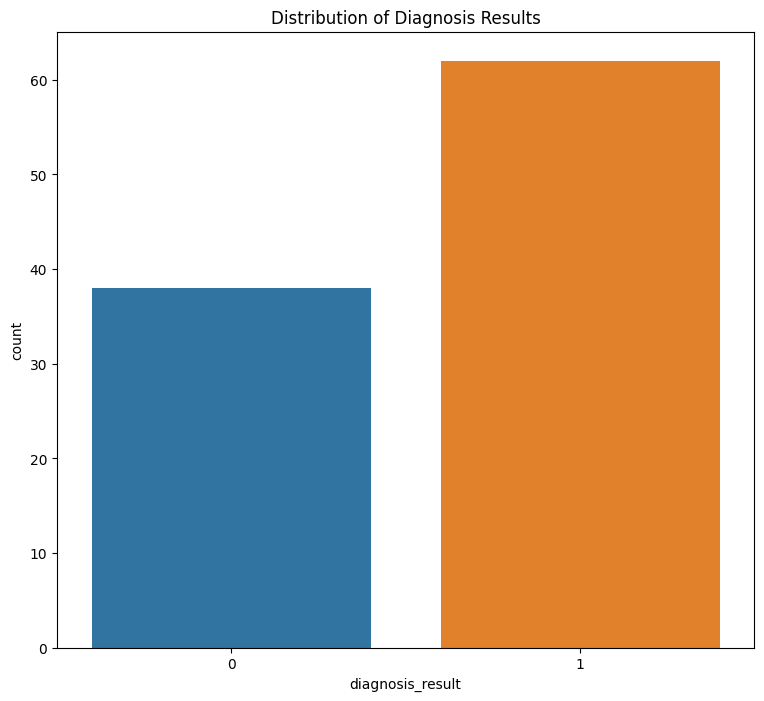

A conclusion that can be drawn from this graph is that results for a malignant diagnosis is a lot higher compared to a benign 
diagnosis.


In [3]:
#Step 3b using Tuatini's process by displaying the distribution of the target variable to make general notes and observations
print(df[target_variable].describe())
plt.figure(figsize=(9, 8))
sns.countplot(x=df[target_variable])
plt.title(label = "Distribution of Diagnosis Results")
plt.show()

print('A conclusion that can be drawn from this graph is that results for a malignant diagnosis is a lot higher compared to a benign \ndiagnosis.')

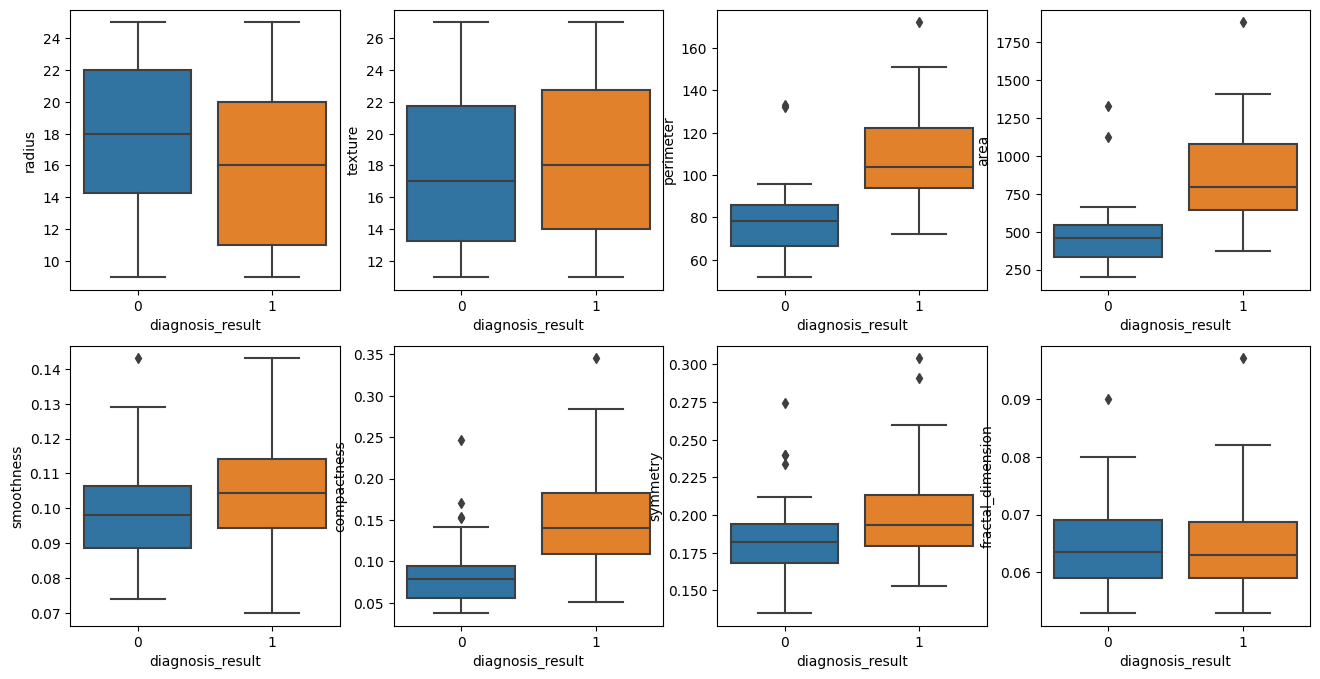

The values with a strong variance compared to the target variable are: area, perimeter, compactness
The values with a slight variance compared to the target variable are: radius, texture, smoothness, symmetry, fractal dimension


In [4]:
#Step 3c uses boxplots to display the relation to the target variable. Then draws conclusions based on the results

#part 1 box plots being displayed
values = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'symmetry', 'fractal_dimension']
fig=plt.figure(figsize=(16,8))
for i in range(len(values)):
    sub=fig.add_subplot(2,4,i+1)
    chart=sns.boxplot(x=target_variable,y=values[i], data=df)
plt.show()

print('The values with a strong variance compared to the target variable are: area, perimeter, compactness')
print('The values with a slight variance compared to the target variable are: radius, texture, smoothness, symmetry, fractal dimension')

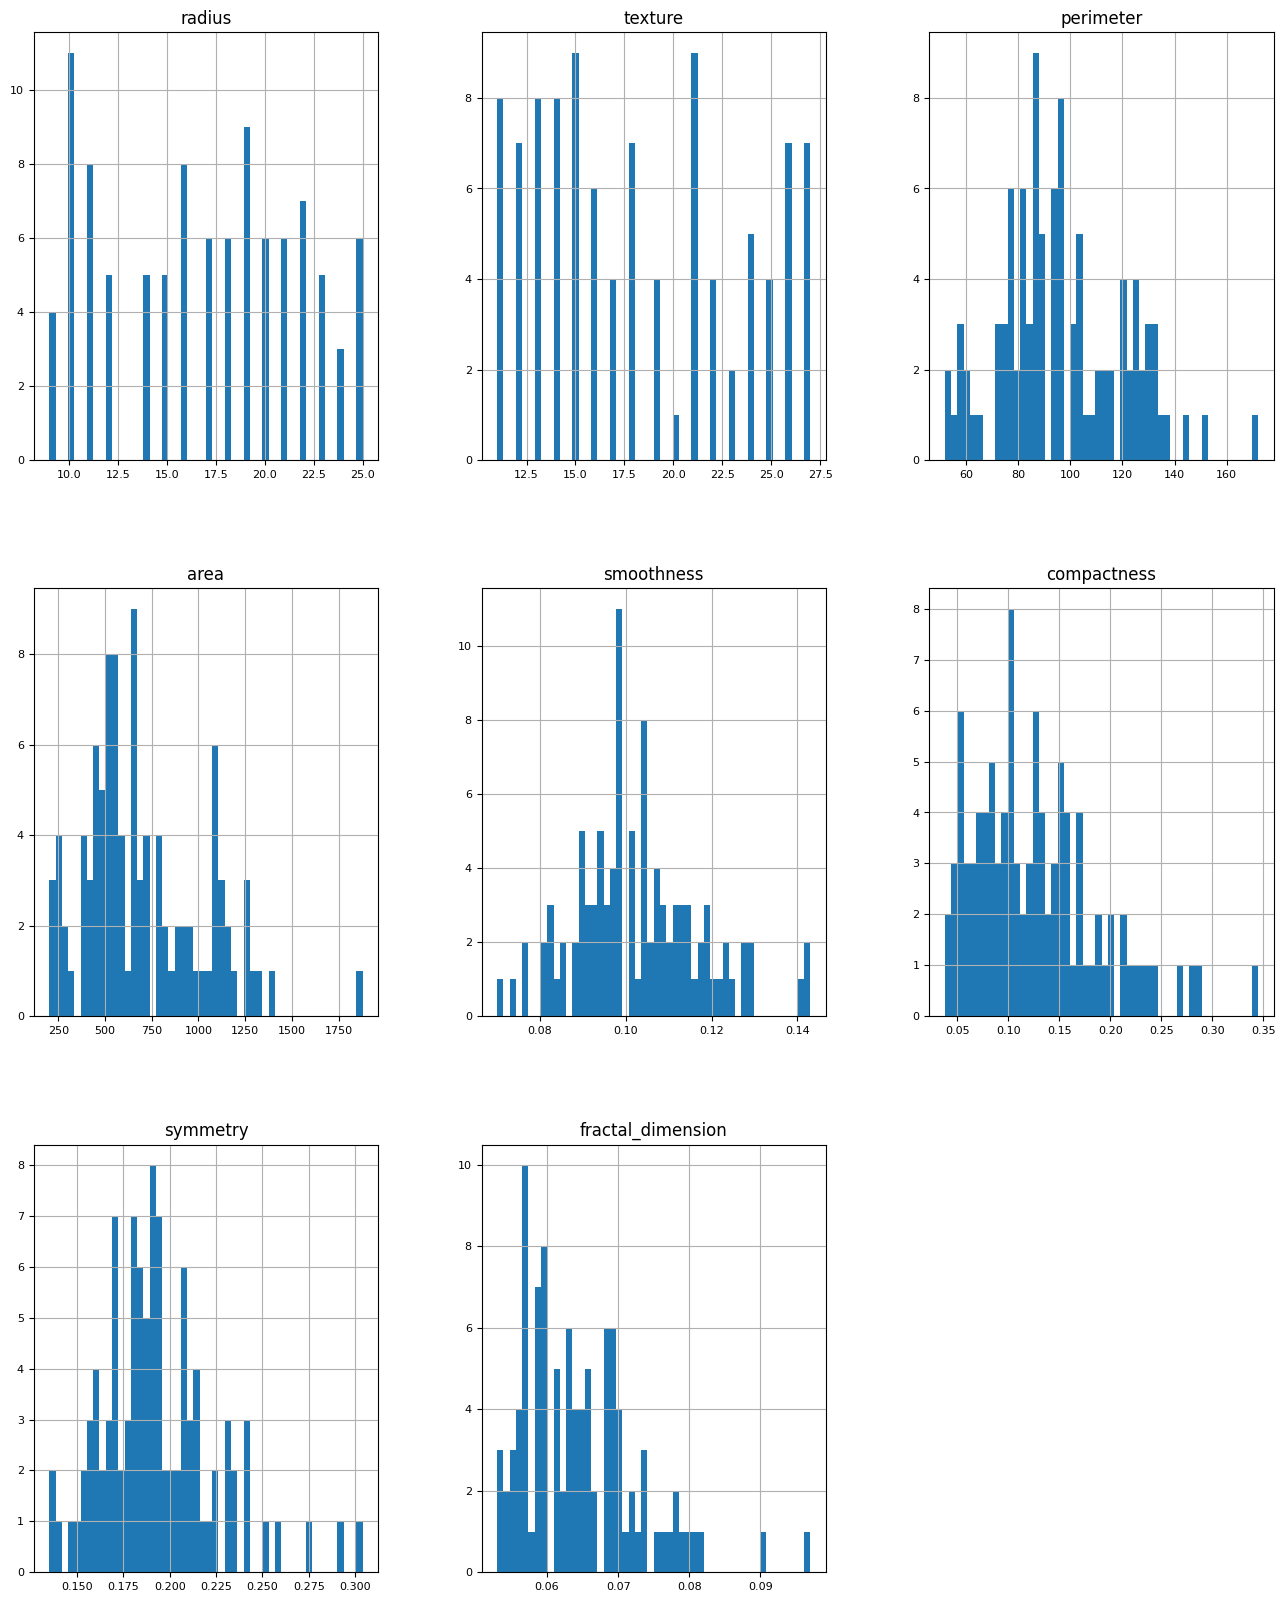

There is a very similar trend in the data with perimeter and area, this requires no modifications to the data frame just yet, but should be observed.


In [5]:
#Step 3d displays numerical values to draw conclusions
df_num = df[['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'symmetry', 'fractal_dimension']]
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()
print("There is a very similar trend in the data with perimeter and area, this requires no modifications to the data frame just yet, but should be observed.")

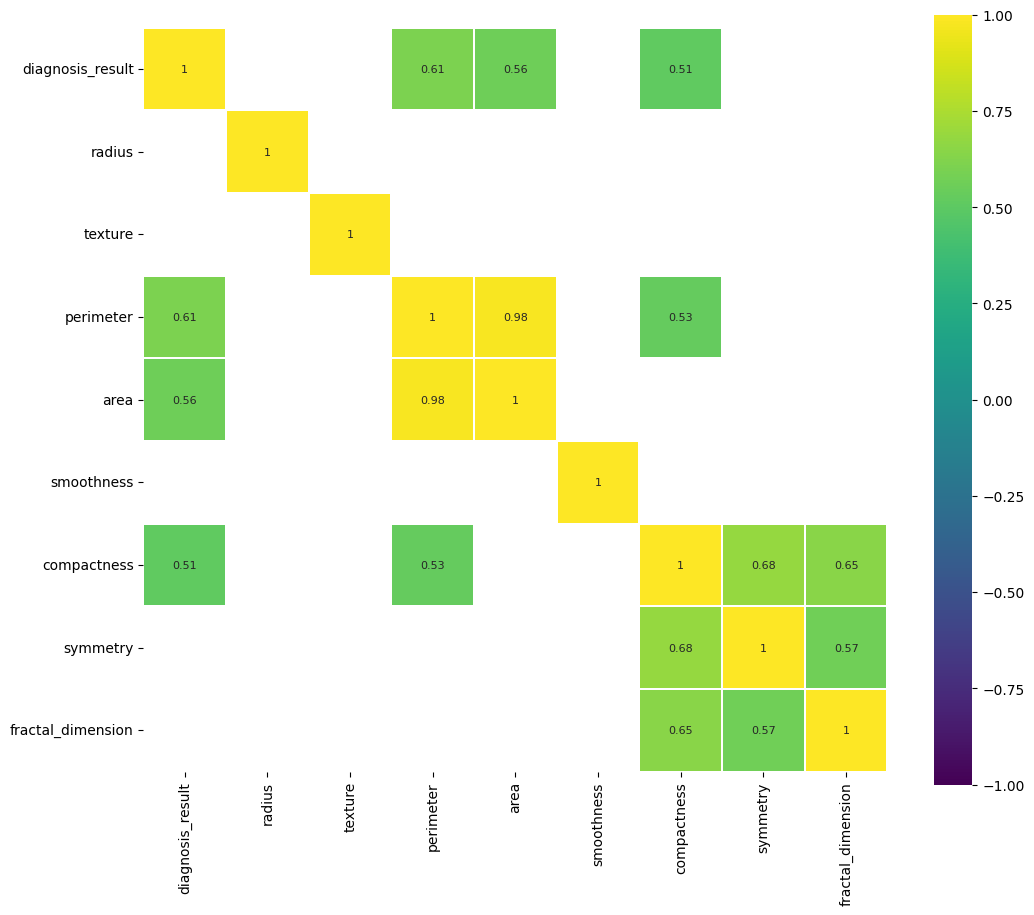

As we have been observing and noting, we can see that Perimeter and area have an extremely high correlation to one another. To counteract this, I will remove area.


In [6]:
#Step 3e uses a heat map like Tuatini's used to observe the correlation of the features to draw conclusions

corr = df.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.show()
print('As we have been observing and noting, we can see that Perimeter and area have an extremely high correlation to one another. To counteract this, I will remove area.')
df = df.drop(['area'], axis = 1)

In [7]:
#Step 3f Finishing data cleaning/analysis
values = ['radius', 'texture', 'perimeter', 'smoothness', 'compactness', 'symmetry', 'fractal_dimension']

#Using Anova test to find unwanted features
x = df.loc[:, values]
y = df.loc[:, target_variable]
diagnosis_results = df[target_variable].values

fs = SelectKBest(score_func=f_classif, k='all')
bestFeatures = fs.fit(x, y)
np.set_printoptions(suppress = True)
print('The f-scores are:\n', bestFeatures.scores_)
print('The p-scores are:\n', bestFeatures.pvalues_)

#removing unwanted features
print('\nThe values that do not have a significant difference according to the results above are: radius, texture, and fractal_dimension')
print('\nBefore dropping these values:\n', df.columns)
df = df.drop(['radius', 'texture', 'fractal_dimension'], axis=1)
print('\nAfter dropping these values:\n', df.columns)

The f-scores are:
 [ 3.16831102  0.49280187 57.32217182  3.98264084 34.86033569  5.62717089
  0.0065575 ]
The p-scores are:
 [0.07817949 0.48434404 0.         0.04874705 0.00000005 0.01963757
 0.93562431]

The values that do not have a significant difference according to the results above are: radius, texture, and fractal_dimension

Before dropping these values:
 Index(['diagnosis_result', 'radius', 'texture', 'perimeter', 'smoothness',
       'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

After dropping these values:
 Index(['diagnosis_result', 'perimeter', 'smoothness', 'compactness',
       'symmetry'],
      dtype='object')


In [8]:
#Step 3g Normalizes the data
x_final = df[['perimeter', 'smoothness', 'compactness', 'symmetry']]
scaler = MinMaxScaler()
x_scaled= scaler.fit_transform(x_final) 
df = pd.DataFrame(x_scaled, columns=['perimeter', 'smoothness', 'compactness', 'symmetry'])
print(df)

    perimeter  smoothness  compactness  symmetry
0    0.825000    1.000000     0.781759  0.633136
1    0.675000    1.000000     0.133550  0.272189
2    0.650000    0.753425     0.397394  0.426036
3    0.216667    0.000000     0.801303  0.739645
4    0.691667    0.972603     0.309446  0.272189
..        ...         ...          ...       ...
95   0.666667    0.287671     0.302932  0.443787
96   0.216667    0.479452     0.107492  0.325444
97   0.083333    0.438356     0.048860  0.000000
98   0.183333    0.273973     0.120521  0.159763
99   0.350000    0.383562     0.247557  0.313609

[100 rows x 4 columns]


In [9]:
#Step 3h Builds the prediction model using Linear Regression with polynomial features
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state = 1, stratify=y)

os = SMOTE(random_state=0)
oversampled_x,oversampled_y=os.fit_resample(x_train, y_train)

model = LogisticRegression(penalty='none', max_iter=2000)

poly_reg = PolynomialFeatures(degree=1, include_bias=False)
poly = poly_reg.fit_transform(oversampled_x)

model.fit(poly, oversampled_y.values.ravel())

y_predicted = model.predict(x_test)
f1 = f1_score(y_test, y_predicted)
score = accuracy_score(y_test, y_predicted)
print("The f1 score of the logistic regression model using Polynomial Features is:", f1)
print("The accuracy score of the logistic regression model using Polynomial Features is:", score)

The f1 score of the logistic regression model using Polynomial Features is: 0.9166666666666666
The accuracy score of the logistic regression model using Polynomial Features is: 0.9


In [10]:
#Step 4 preparing to deploy the model
pickle.dump(model, open("model.pkl", "wb"))
pickle.dump(scaler, open('scaler.pkl', 'wb'))